In [1]:
import seaborn as sns

In [2]:
td=sns.load_dataset("titanic")
td.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
td.shape

(891, 15)

In [4]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
td.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
td.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
td.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

Visualize the distribution of numeric variables

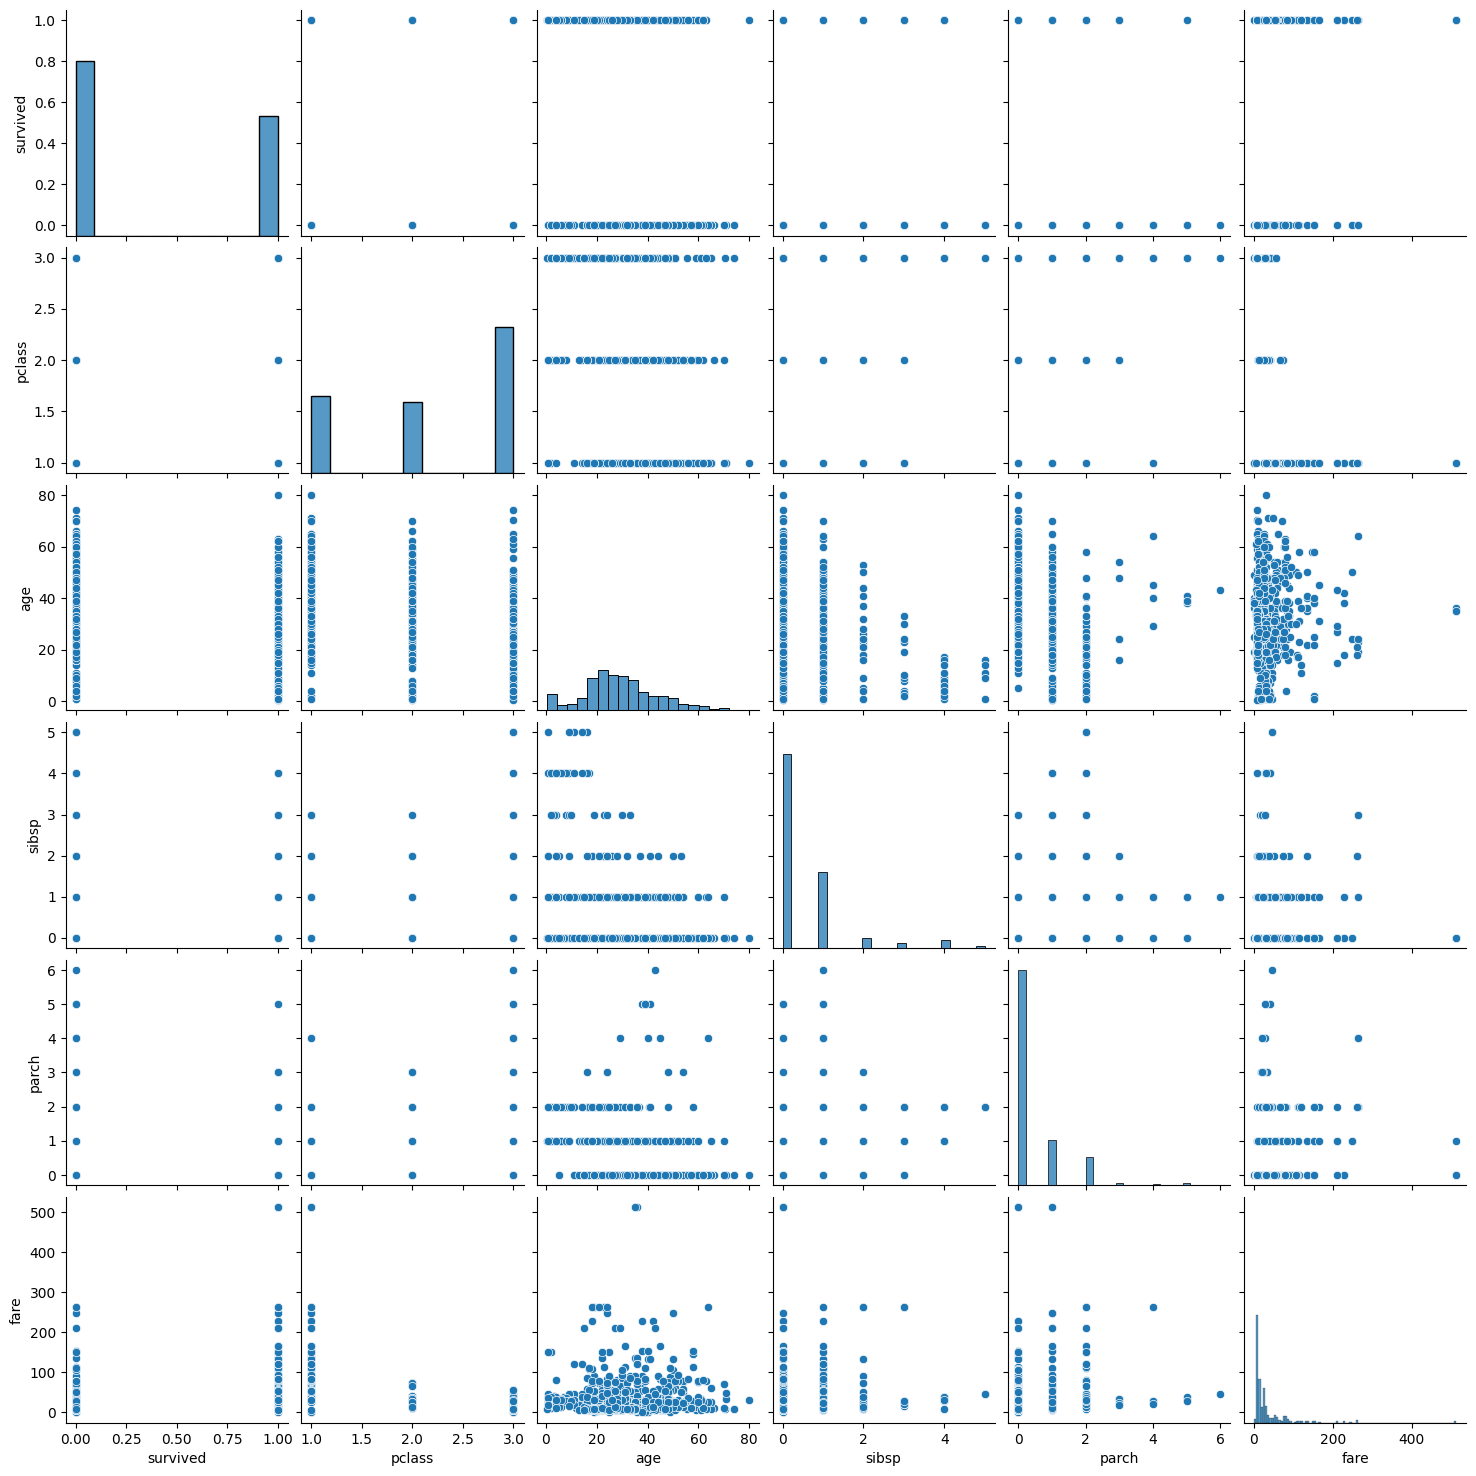

In [8]:
import matplotlib.pyplot as plt
numeric_columns = td.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(td[numeric_columns].dropna())
plt.show()

Visualize the distribution of categorical variables

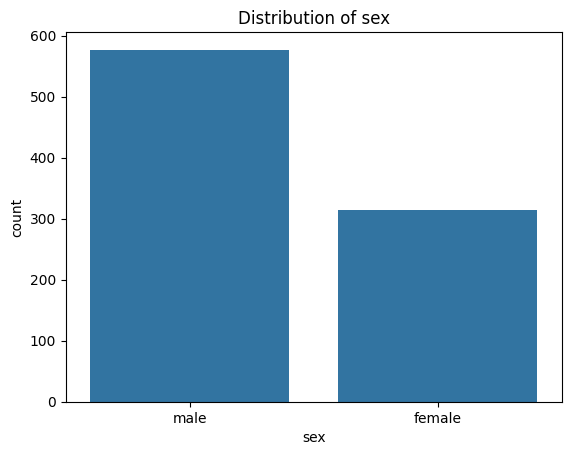

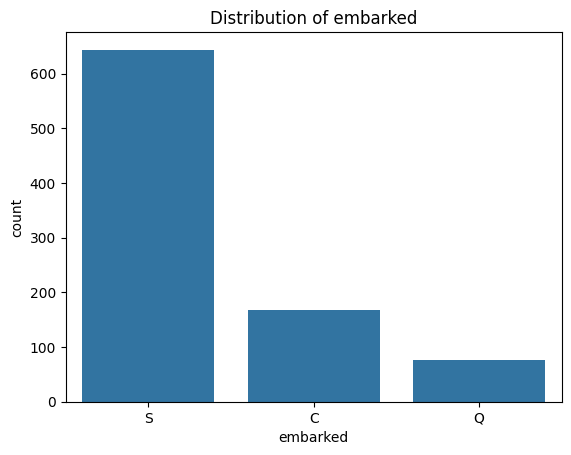

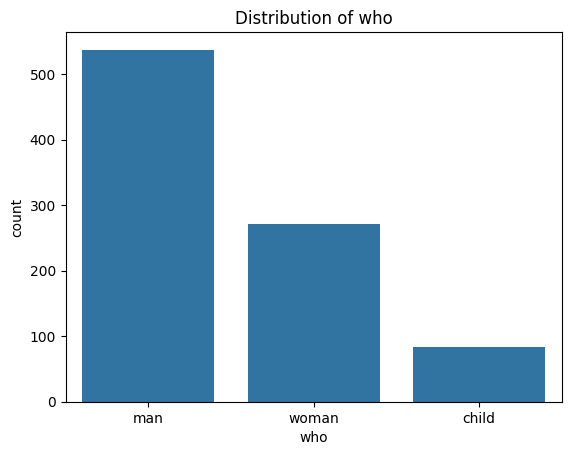

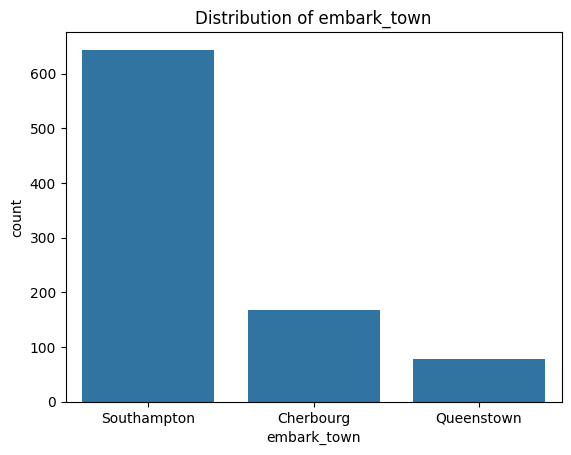

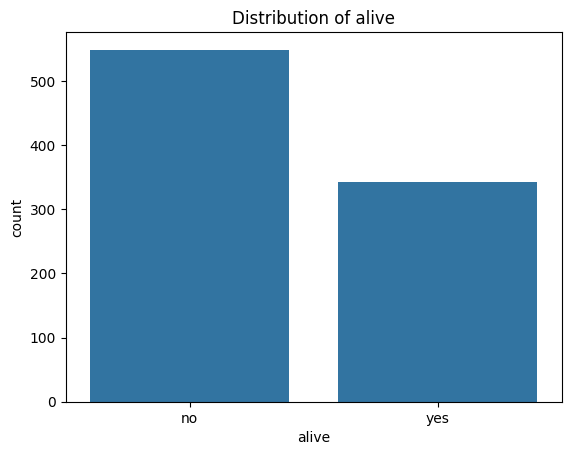

In [9]:
categorical_columns = td.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=column, data=td)
    plt.title(f"Distribution of {column}")
    plt.show()

Relationship between survival and other variables

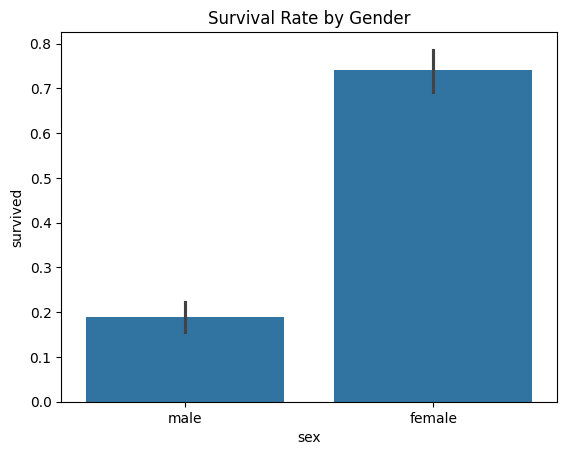

In [10]:
#Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=td)
plt.title("Survival Rate by Gender")
plt.show()

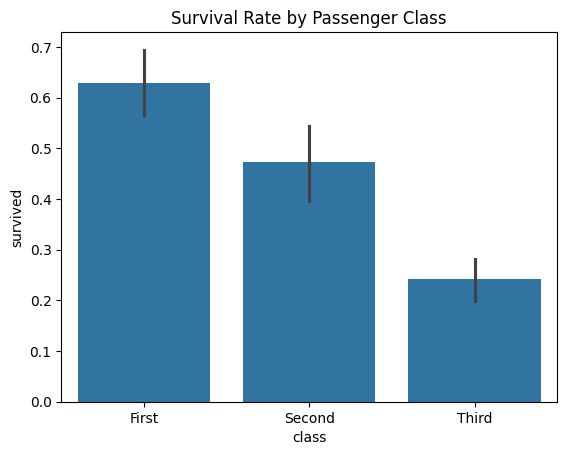

In [11]:
#Survival Rate by Passenger Class
sns.barplot(x='class', y='survived', data=td)
plt.title("Survival Rate by Passenger Class")
plt.show()


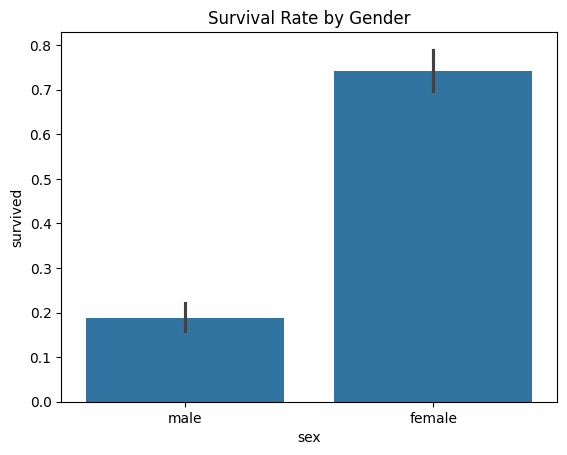

In [12]:
#Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=td)
plt.title("Survival Rate by Gender")
plt.show()


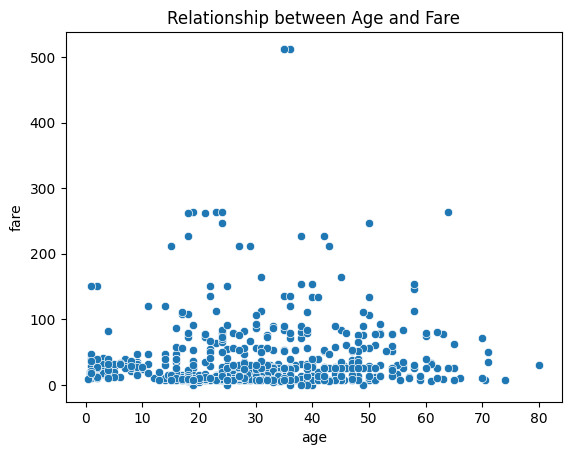

In [13]:
#Relationship between Age and Fare
sns.scatterplot(x='age', y='fare', data=td)
plt.title("Relationship between Age and Fare")
plt.show()


Correlation heatmap for numeric variables

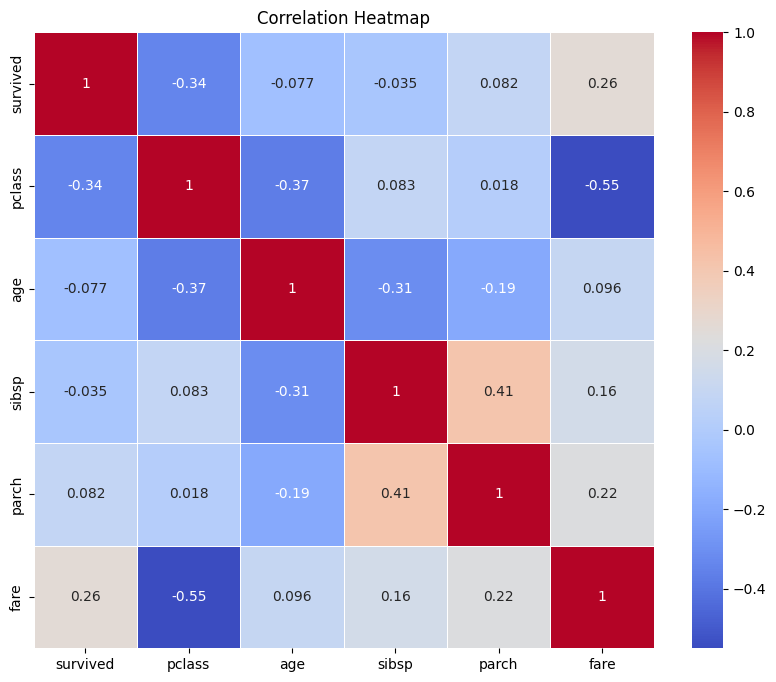

In [14]:
# Select only numeric columns
numeric_columns_only = td.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns_only.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
